# Report (README)

In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
tcolors = {
    k.replace('tab:', ''): v
    for k, v in mcolors.TABLEAU_COLORS.items()
}

tcolors.keys()

dict_keys(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])

In [25]:
COLORS = {
    'p3dresnet': [tcolors['green'], tcolors['purple']],
    'resnet50': [tcolors['blue'], tcolors['orange']],
}

def plot_vs_ref(dat, ref):
    
    # colors
    if 'p3dresnet' in dat:
        train_dat_color, valid_dat_color = COLORS['p3dresnet']
    else:
        train_dat_color, valid_dat_color = COLORS['resnet50']
    if 'p3dresnet' in ref:
        train_ref_color, valid_ref_color = COLORS['p3dresnet']
    else:
        train_ref_color, valid_ref_color = COLORS['resnet50']
    
    # plot
    plt.figure(figsize=[10, 3])
    
    # train
    plt.plot(logs[dat]['epoch'], logs[dat]['dice_coef'],
         color=train_dat_color, linestyle='solid', label=dat)
    plt.plot(logs[ref]['epoch'], logs[ref]['dice_coef'],
         color=train_ref_color, linestyle='dashed', label=ref)
    # valid
    plt.plot(logs[dat]['epoch'], logs[dat]['val_dice_coef'],
         color=valid_dat_color, linestyle='solid')
    plt.plot(logs[ref]['epoch'], logs[ref]['val_dice_coef'],
         color=valid_ref_color, linestyle='dashed')
    
    # settings
    #plt.title(f'{dat} vs {ref}')
    plt.legend(loc='upper left', facecolor='white', framealpha=1.0)
    plt.ylim(0., 0.7)
    plt.grid(axis='y', color='lightgrey')

In [26]:
log_dir = Path('.')

In [27]:
list(log_dir.iterdir())

[PosixPath('identify-contrails_2023-07-28_21-28-24_log.csv'),
 PosixPath('identify-contrails_2023-07-31_17-55-47_log.csv'),
 PosixPath('identify-contrails_2023-07-28_21-26-12_log.csv'),
 PosixPath('identify-contrails_2023-07-30_10-32-45_log.csv'),
 PosixPath('identify-contrails_2023-07-25_00-58-50_log.csv'),
 PosixPath('identify-contrails_2023-07-28_19-34-15_log.csv'),
 PosixPath('identify-contrails_2023-07-31_14-40-32_log.csv'),
 PosixPath('identify-contrails_2023-07-24_21-10-06_log.csv'),
 PosixPath('identify-contrails_2023-07-24_22-38-16_log.csv'),
 PosixPath('.ipynb_checkpoints'),
 PosixPath('History.ipynb'),
 PosixPath('identify-contrails_2023-07-31_23-01-22_log.csv'),
 PosixPath('identify-contrails_2023-07-29_16-03-20_log.csv'),
 PosixPath('identify-contrails_2023-07-31_08-06-27_log.csv'),
 PosixPath('identify-contrails_2023-07-30_21-40-59_log.csv'),
 PosixPath('identify-contrails_2023-07-28_22-38-12_log.csv'),
 PosixPath('identify-contrails_2023-07-29_21-28-43_log.csv')]

## List of runs

In [28]:
logs = {}
# DeepLabV3+ ResNet50
logs['deeplab_resnet50_ref'] = pd.read_csv(next(log_dir.glob('*07-24_22-38-16*')))
logs['deeplab_resnet50_lr002'] = pd.read_csv(next(log_dir.glob('*07-25_00-58-50*')))
logs['deeplab_resnet50_dropout'] = pd.read_csv(next(log_dir.glob('*07-30_10-32-45*')))
logs['deeplab_resnet50_lr001_50ep'] = pd.read_csv(next(log_dir.glob('*07-31_08-06-27*')))
logs['deeplab_resnet50_lr002_25ep'] = pd.read_csv(next(log_dir.glob('*07-31_14-40-32*')))
logs['deeplab_resnet50_lr002_25ep_woaugm'] = pd.read_csv(next(log_dir.glob('*07-31_17-55-47*')))

# DeepLabV3+ P3DResNet
logs['deeplab_p3dresnet_ref'] = pd.read_csv(next(log_dir.glob('*07-29_16-03-20*')))
logs['deeplab_p3dresnet_lr002'] = pd.read_csv(next(log_dir.glob('*07-28_21-26-12*')))  # v32
logs['deeplab_p3dresnet_gradacc'] = pd.read_csv(next(log_dir.glob('*07-28_21-28-24*')))  # v33
logs['deeplab_p3dresnet_gradacc-lr002'] = pd.read_csv(next(log_dir.glob('*07-28_22-38-12*')))
logs['deeplab_p3dresnet_dropout'] = pd.read_csv(next(log_dir.glob('*07-29_21-28-43*')))
logs['deeplab_p3dresnet_lr001_50ep'] = pd.read_csv(next(log_dir.glob('*07-30_21-40-59*')))
logs['deeplab_p3dresnet_lr002_50ep_woaugm'] = pd.read_csv(next(log_dir.glob('*07-31_23-01-22*')))

In [29]:
logs['deeplab_p3dresnet_ref'].columns

Index(['epoch', 'dice_coef', 'loss', 'lr', 'val_dice_coef', 'val_loss'], dtype='object')

## DeepLabV3+/ResNet50

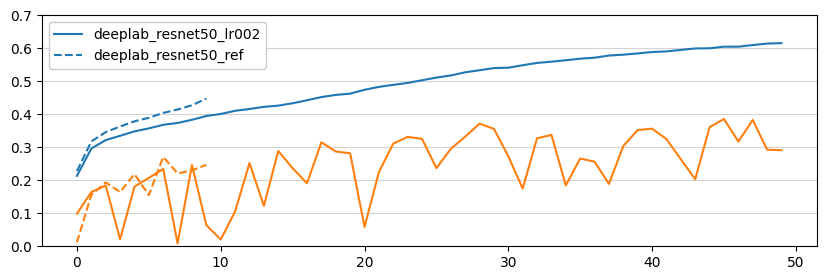

In [30]:
plot_vs_ref('deeplab_resnet50_lr002', 'deeplab_resnet50_ref')

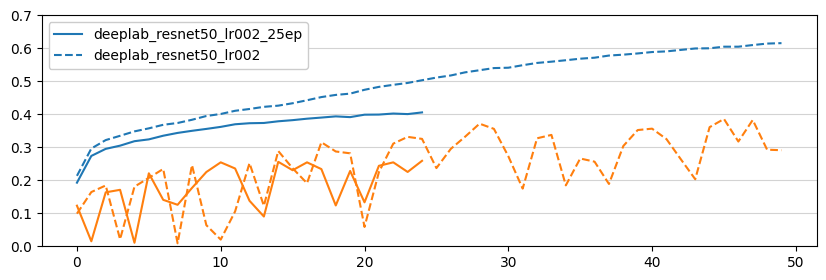

In [31]:
plot_vs_ref('deeplab_resnet50_lr002_25ep', 'deeplab_resnet50_lr002')

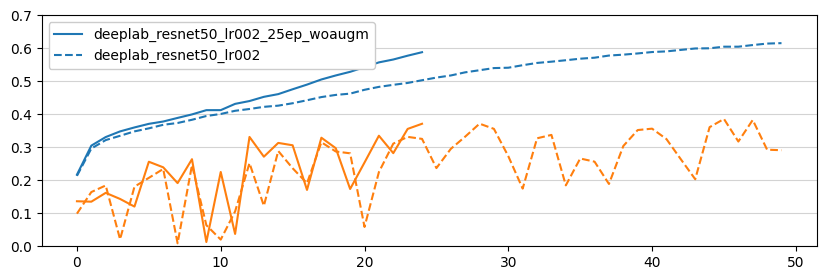

In [32]:
plot_vs_ref('deeplab_resnet50_lr002_25ep_woaugm', 'deeplab_resnet50_lr002')

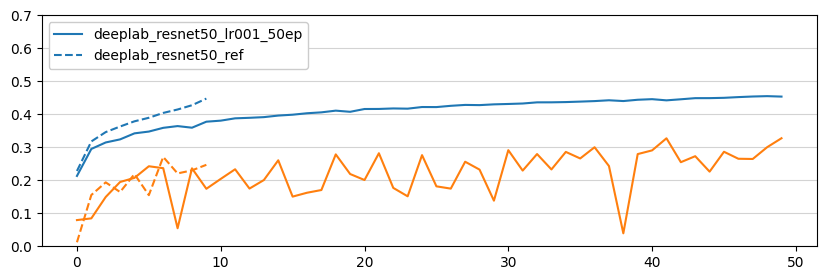

In [33]:
plot_vs_ref('deeplab_resnet50_lr001_50ep', 'deeplab_resnet50_ref')

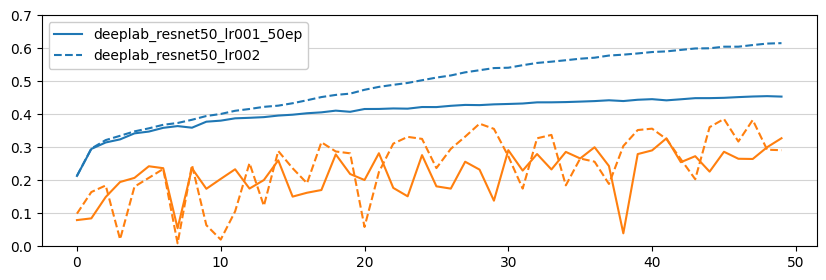

In [34]:
plot_vs_ref('deeplab_resnet50_lr001_50ep', 'deeplab_resnet50_lr002')

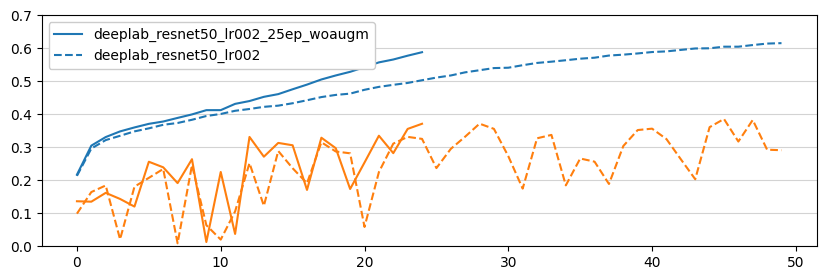

In [35]:
plot_vs_ref('deeplab_resnet50_lr002_25ep_woaugm', 'deeplab_resnet50_lr002')

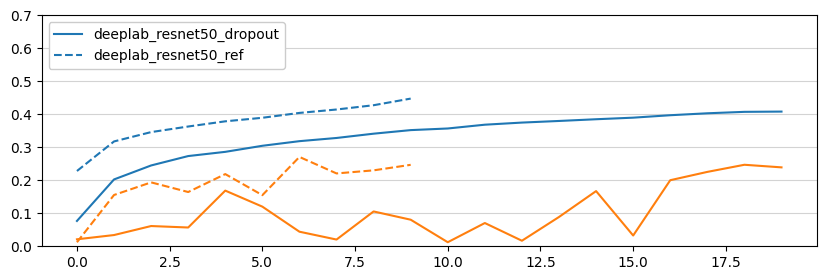

In [36]:
plot_vs_ref('deeplab_resnet50_dropout', 'deeplab_resnet50_ref')

## DeepLabV3+/P3DResNet

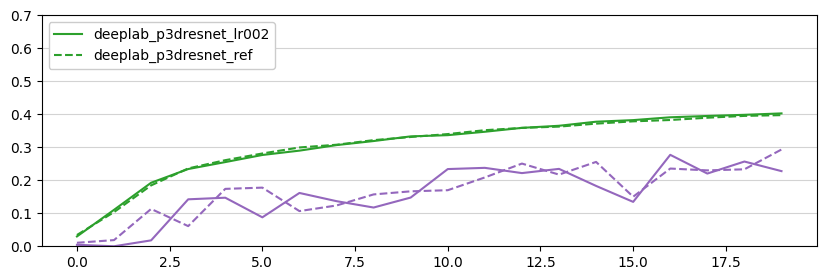

In [37]:
plot_vs_ref('deeplab_p3dresnet_lr002', 'deeplab_p3dresnet_ref')

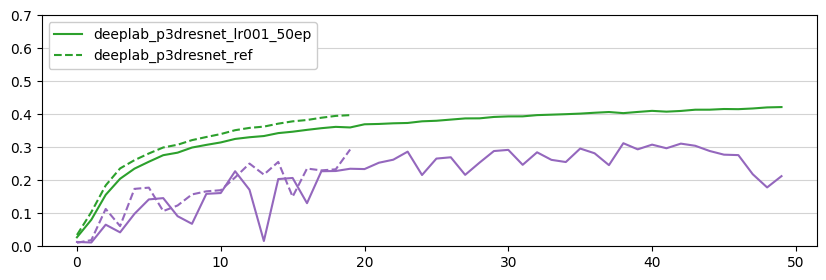

In [38]:
plot_vs_ref('deeplab_p3dresnet_lr001_50ep', 'deeplab_p3dresnet_ref')

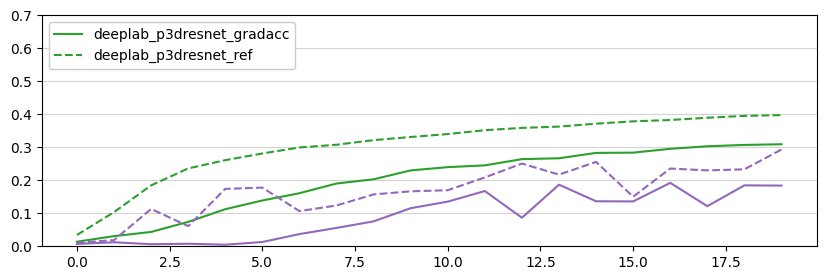

In [39]:
plot_vs_ref('deeplab_p3dresnet_gradacc', 'deeplab_p3dresnet_ref')

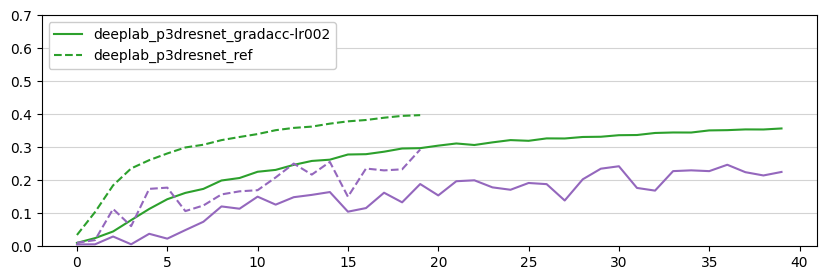

In [40]:
plot_vs_ref('deeplab_p3dresnet_gradacc-lr002', 'deeplab_p3dresnet_ref')

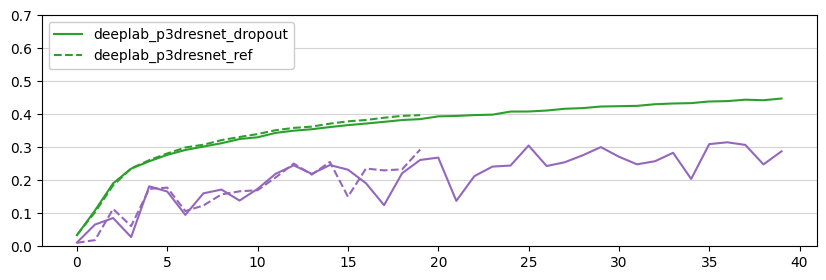

In [41]:
plot_vs_ref('deeplab_p3dresnet_dropout', 'deeplab_p3dresnet_ref')

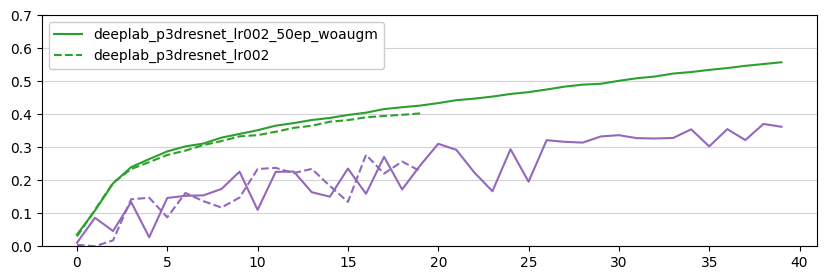

In [42]:
plot_vs_ref('deeplab_p3dresnet_lr002_50ep_woaugm', 'deeplab_p3dresnet_lr002')

## DeepLabV3+/P3DResNet vs ResNet50

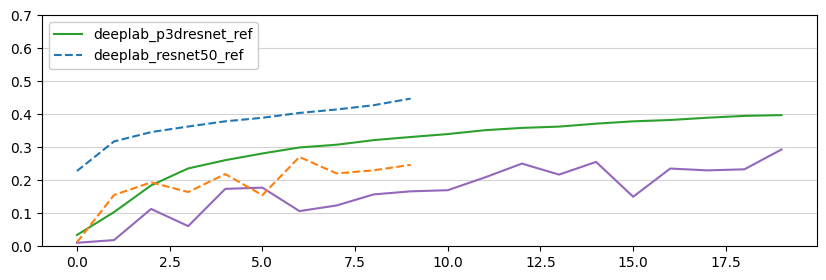

In [43]:
plot_vs_ref('deeplab_p3dresnet_ref', 'deeplab_resnet50_ref')

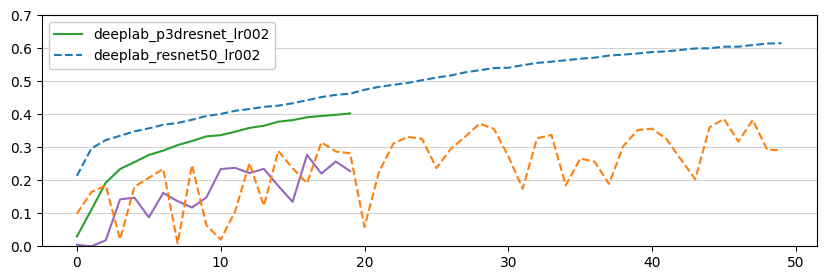

In [44]:
plot_vs_ref('deeplab_p3dresnet_lr002', 'deeplab_resnet50_lr002')

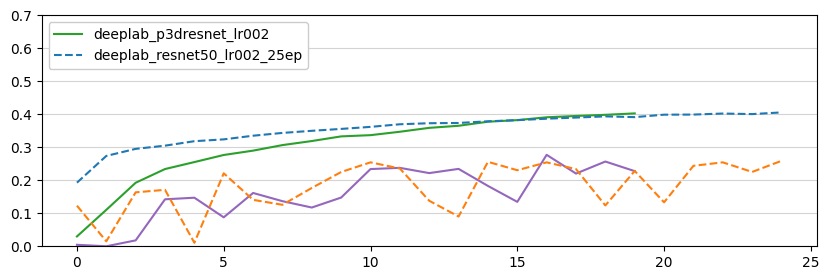

In [45]:
plot_vs_ref('deeplab_p3dresnet_lr002', 'deeplab_resnet50_lr002_25ep')

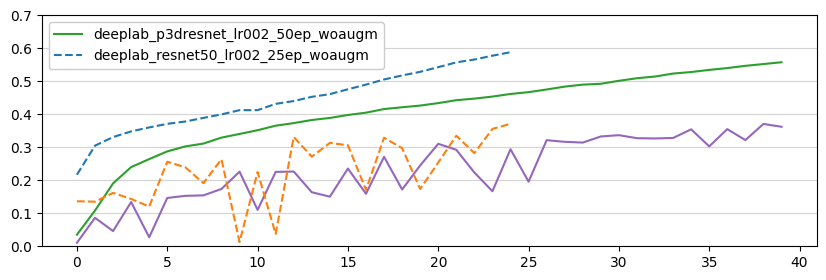

In [46]:
plot_vs_ref('deeplab_p3dresnet_lr002_50ep_woaugm', 'deeplab_resnet50_lr002_25ep_woaugm')

## Training times

- `deeplab_resnet50`: 50 epochs in 4 h i.e. < **5 h**
- `deeplab_p3dresnet`: 50 epochs in 9 h i.e. < **10 h**